# Data Mining Final Project

## Pokemon Clustering with TSNE

### The goal of this project is based on the current list of legendary Pokemon's and their statistics, can we predict other Pokemon's that are legendary as well?

### We first look at the clustering results without TSNE, the result was bad. And then we apply TSNE for dimension reduction and plot it again.

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
pd.set_option('display.max_columns', None)
cleaned = pd.read_csv('Pokemon_cleaned.csv', index_col=0)
cleaned.head(3)

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,name,sp_attack,sp_defense,speed,type1,type2,weight_kg,is_legendary
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,0.45,49,1059860,0.7,45,Bulbasaur,65,65,45,grass,poison,6.9,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,0.45,63,1059860,1.0,60,Ivysaur,80,80,60,grass,poison,13.0,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,0.45,123,1059860,2.0,80,Venusaur,122,120,80,grass,poison,100.0,0


In [3]:
cleaned.type1.value_counts()

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
poison       32
ground       32
dark         29
fighting     28
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

In [4]:
cleaned.type2.value_counts()

none        384
flying       95
poison       34
ground       34
psychic      29
fairy        29
fighting     25
steel        22
dark         21
grass        20
water        17
dragon       17
ice          15
rock         14
ghost        14
fire         13
electric      9
bug           5
normal        4
Name: type2, dtype: int64

In [3]:
cleaned.columns

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'capture_rate', 'defense',
       'experience_growth', 'height_m', 'hp', 'name', 'sp_attack',
       'sp_defense', 'speed', 'type1', 'type2', 'weight_kg', 'is_legendary'],
      dtype='object')

In [6]:
x = cleaned.drop(['name', 'type1', 'type2', 'is_legendary'], axis =1)

## KMeans without TSNE

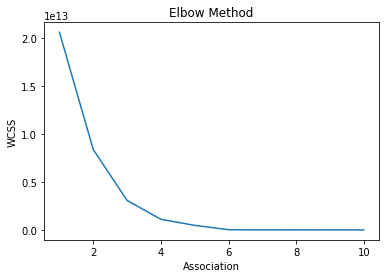

In [7]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Association')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [8]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

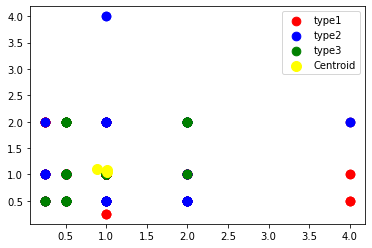

In [9]:
X = np.array(x)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 75, 
            c = 'red', label = 'type1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 75, 
            c = 'blue', label = 'type2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 75, 
            c = 'green', label = 'type3')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], s = 100, 
            c = 'yellow', label = 'Centroid')

plt.legend()

## DBSCAN

In [10]:
from sklearn.cluster import DBSCAN
dbsc = DBSCAN(eps = 5, min_samples = 500).fit(x)
core_samples = np.zeros_like(dbsc.labels_, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True
db_labels = dbsc.labels_

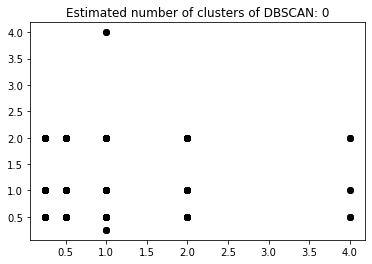

In [50]:
n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise_ = list(db_labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(db_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = db_labels == k
    
    xy = x[class_member_mask & core_samples]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = x[class_member_mask & ~core_samples]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters of DBSCAN: %d" % n_clusters_)
plt.show()

## Hierachical Clustering

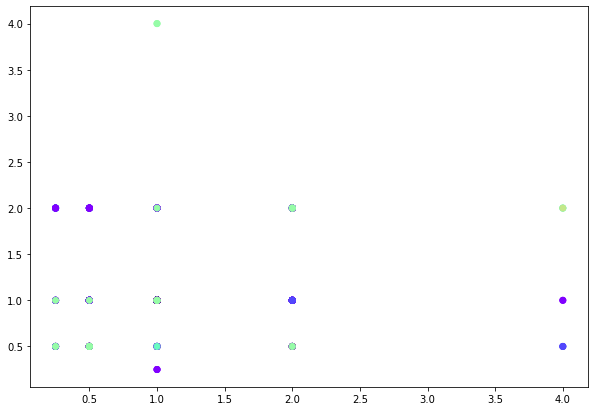

In [53]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')  

## Dendrogram

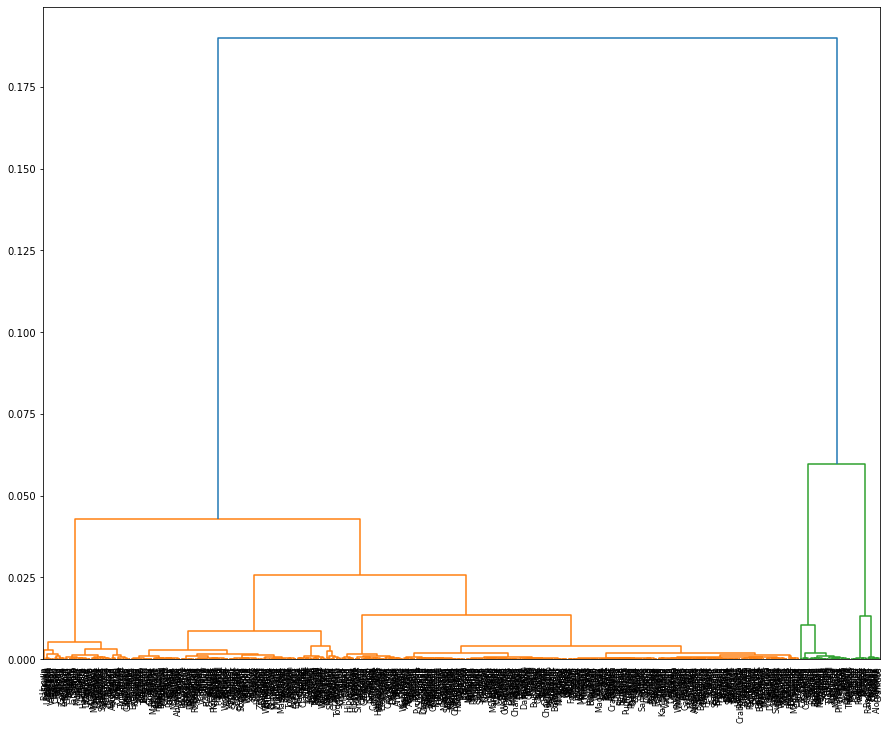

In [66]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

movementss=x.values
names = np.array(cleaned.name)
normalized_movements = normalize(movementss)
plt.figure(figsize=(15,12))

mergings = linkage(normalized_movements, method='ward') 

dendrogram(
    mergings,
    labels = names,
    leaf_rotation=90.,
    leaf_font_size=8
)

plt.show()

## KNN

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x = cleaned.drop(['name', 'type1', 'type2', 'is_legendary'], axis =1)
y = cleaned['is_legendary']
X_train,X_test,y_train, y_test = train_test_split(x, y, train_size = 0.8)

In [12]:
classifier = KNeighborsClassifier(n_neighbors=13,p=2,metric='euclidean')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[148   0]
 [  0  13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00        13

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



### the clustering results are not good for many methods, so we will try use TSNE before using KMeans for clustering.

## TSNE

getting the rank of typeID for better calculation in the following steps

In [11]:
cleaned['Type1Id'] = cleaned['type1'].rank(method='dense').astype(int)
cleaned.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,name,sp_attack,sp_defense,speed,type1,type2,weight_kg,is_legendary,Type1Id
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,0.45,49,1059860,0.7,45,Bulbasaur,65,65,45,grass,poison,6.9,0,10
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,0.45,63,1059860,1.0,60,Ivysaur,80,80,60,grass,poison,13.0,0,10
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,0.45,123,1059860,2.0,80,Venusaur,122,120,80,grass,poison,100.0,0,10
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,0.45,43,1059860,0.6,39,Charmander,60,50,65,fire,none,8.5,0,7
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,0.45,58,1059860,1.1,58,Charmeleon,80,65,80,fire,none,19.0,0,7


In [12]:
cleaned.columns

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'capture_rate', 'defense',
       'experience_growth', 'height_m', 'hp', 'name', 'sp_attack',
       'sp_defense', 'speed', 'type1', 'type2', 'weight_kg', 'is_legendary',
       'Type1Id'],
      dtype='object')

### we pick base stat feature of Pokemon for TSNE and typeID would be the target to cluster.

In [14]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

features = ['base_total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'is_legendary',
            'height_m','weight_kg','base_egg_steps','base_happiness','capture_rate']
targets  = ['Type1Id']
types1 = cleaned['type1'].unique()

In [67]:
x = cleaned[features]
df_norm = cleaned.copy()
df_norm[features] = StandardScaler().fit(x).transform(x)

In [68]:
X_tsne = TSNE(learning_rate=500, n_components=2).fit_transform(df_norm[features])

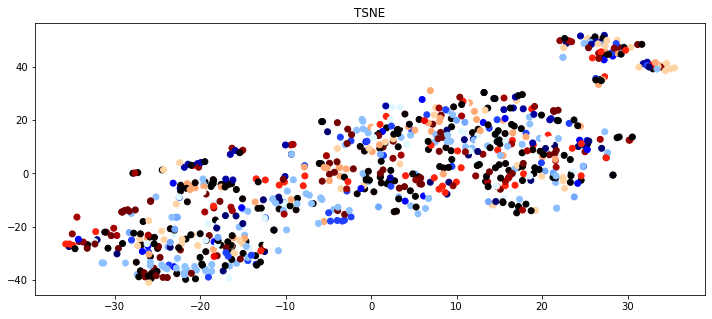

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
cmap = plt.get_cmap('flag')
xs =X_tsne[:,0]
ys=X_tsne[:,1]
plt.scatter(xs,ys, c=cmap(cleaned['Type1Id'] / len(types1)))
plt.title('TSNE')
plt.show()

Text(0.5, 1.0, 'TSNE_legendary_highlighted')

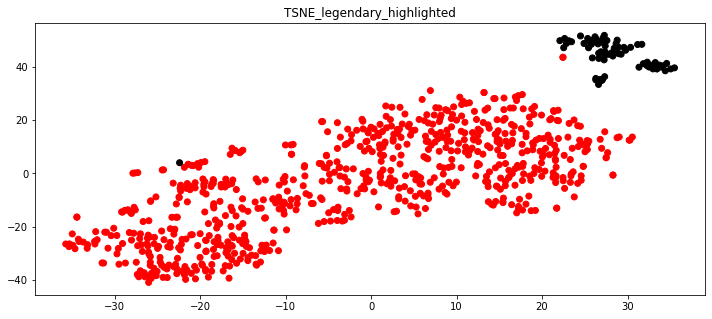

In [72]:
figure(figsize=(12, 5))
cmap = plt.get_cmap('flag')

scatter(X_tsne[:, 0], X_tsne[:, 1], c=cmap(cleaned['is_legendary'] * 1.))
title('TSNE_legendary_highlighted')

### Clearly the legendary feature is too distinguish from other features, so we need to exclude them in clustering.

In [48]:
df = cleaned.drop(['is_legendary'], axis=1)
#feature0 is the feature set without legendary feature
features0 = ['base_total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed','height_m','weight_kg',
             'base_egg_steps','base_happiness','capture_rate']
StandardScaler().fit(df[features0]).transform(df[features0])

num_clusters = 5
X_tsne = TSNE(learning_rate=600, n_components=2).fit_transform(df_norm[features0])
kmeans_tsne = KMeans(n_clusters=num_clusters).fit(X_tsne)

Text(0.5, 1.0, 'TSNE')

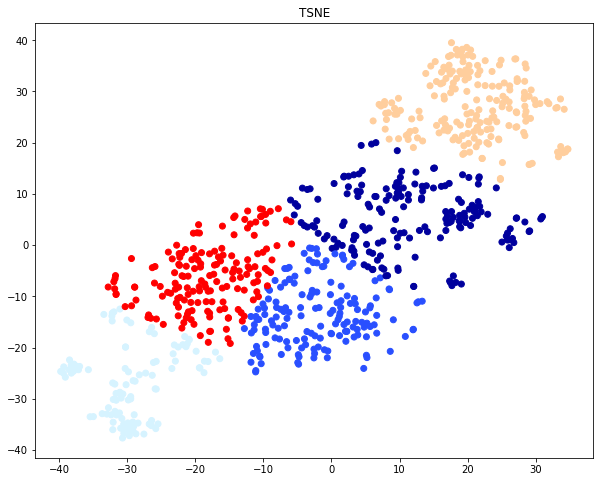

In [51]:
figure(figsize=(10, 8))
cmap = plt.get_cmap('flag')

scatter(X_tsne[:, 0], X_tsne[:, 1], c=cmap(kmeans_tsne.labels_ / num_clusters))
title('TSNE')

### next we will look at how the cluster distribute when legendary == 0

In [56]:
df = cleaned[cleaned['is_legendary']==0]
features0 = ['base_total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed','height_m','weight_kg',
             'base_egg_steps','base_happiness','capture_rate']
StandardScaler().fit(df[features0]).transform(df[features0])

X_tsne = TSNE(learning_rate=600, n_components=2).fit_transform(df_norm[features0])
kmeans_tsne = KMeans(n_clusters=num_clusters).fit(X_tsne)

Text(0.5, 1.0, 'TSNE')

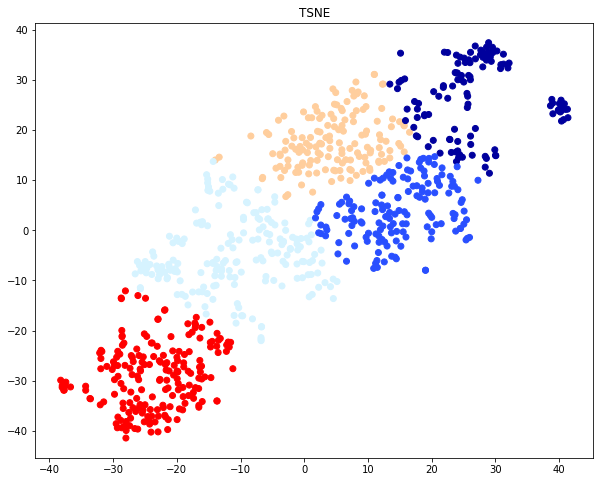

In [57]:
figure(figsize=(10, 8))
cmap = plt.get_cmap('flag')

scatter(X_tsne[:, 0], X_tsne[:, 1], c=cmap(kmeans_tsne.labels_ / num_clusters))
title('TSNE')

### we will look at how the cluster distribute when legendary =1

In [58]:
df = cleaned[cleaned['is_legendary']==1]
features0 = ['base_total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed','height_m','weight_kg',
             'base_egg_steps','base_happiness','capture_rate']
StandardScaler().fit(df[features0]).transform(df[features0])

X_tsne = TSNE(learning_rate=600, n_components=2).fit_transform(df_norm[features0])
kmeans_tsne = KMeans(n_clusters=num_clusters).fit(X_tsne)

Text(0.5, 1.0, 'TSNE')

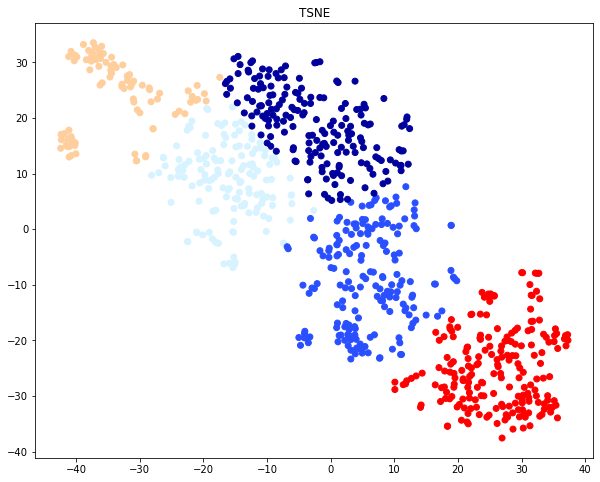

In [59]:
figure(figsize=(10, 8))
cmap = plt.get_cmap('flag')
scatter(X_tsne[:, 0], X_tsne[:, 1], c=cmap(kmeans_tsne.labels_ / num_clusters))
title('TSNE')